In [1]:
%pylab inline
plt.style.use("default")
import os, sys
import scipy
import random
import pandas as pd
import helpers as h
import spontHelpers as sh
import utils as u
import matplotlib as mpl
from glob import glob
from scipy.io import loadmat
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

plt.rcParams['figure.figsize'] = (15, 10) 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def clean_unpack(data0):
    """returns clean and zscored signal"""
    resp0, spon0, istim0 = h.unbox(data0)

    resp0 = h.denoise_resp(resp0, spon0)

    resp0 = h.dupSignal(resp0, istim0)

    return resp0, spon0

In [3]:
def get_subpops(x, y, dx, dy, resp):
    inxs = []
    subpops = []
    xmax = x.max()
    ymax = y.max()
    Xrange = np.arange(xmax, step=dx)
    Yrange = np.arange(ymax, step=dy)
    for x0 in Xrange:
        for y0 in Yrange:
            x1 = x0+dx
            y1 = y0+dx
            inx = np.where(((x>x0) & (x<x1)) & ((y > y0) & (y < y1)))
            inxs.append(inx)
            subpop = resp[:, :, inx].squeeze(axis=2)
            subpops.append((((x0, x1), (y0, y1)), subpop))
    return subpops, inxs 

In [4]:
def compute_cvPCA(resp0, maxcols=69):
    ss0 = u.shuff_cvPCA(resp0, nshuff=10, maxcols=maxcols)
    ss0 = ss0.mean(axis=0)
    ss0 = ss0 / ss0.sum()

    return ss0

In [5]:
data_root = "/camp/home/duuta/working/duuta/ppp0/data/stringer/live_data/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]


In [6]:
spontList  = []  # spont was recorded for 30mins ( mostly grey scale, interspersed with blanks)
for i in range(6):
    data = loadmat( os.path.join(data_root, data_files[i]), simplify_cells=True)
    _, spon0 = clean_unpack(data)
    print("here is the shape", spon0.shape)
    spontList.append(spon0)
    

here is the shape (280, 10079)


here is the shape (2565, 14062)


here is the shape (335, 10145)


here is the shape (4696, 11449)


here is the shape (335, 9476)


here is the shape (280, 10103)


In [7]:
nwsList = []
nstim = 280
for arr in spontList:
    sp0 = arr[:nstim, :]
    nwsList.append(sp0)

In [8]:
for arr in nwsList:
    print(arr.shape)

(280, 10079)
(280, 14062)
(280, 10145)
(280, 11449)
(280, 9476)
(280, 10103)


In [12]:
ass = []
kiks = []
for arr in nwsList:
    ss = sh.ssplit(arr)
    kiks.append(arr.shape[1])
    ss0 = compute_cvPCA(ss, maxcols=100)
    a, _, _ = u.get_powerlaw(ss0, np.arange(11, 90).astype('int'))
    ass.append(a)

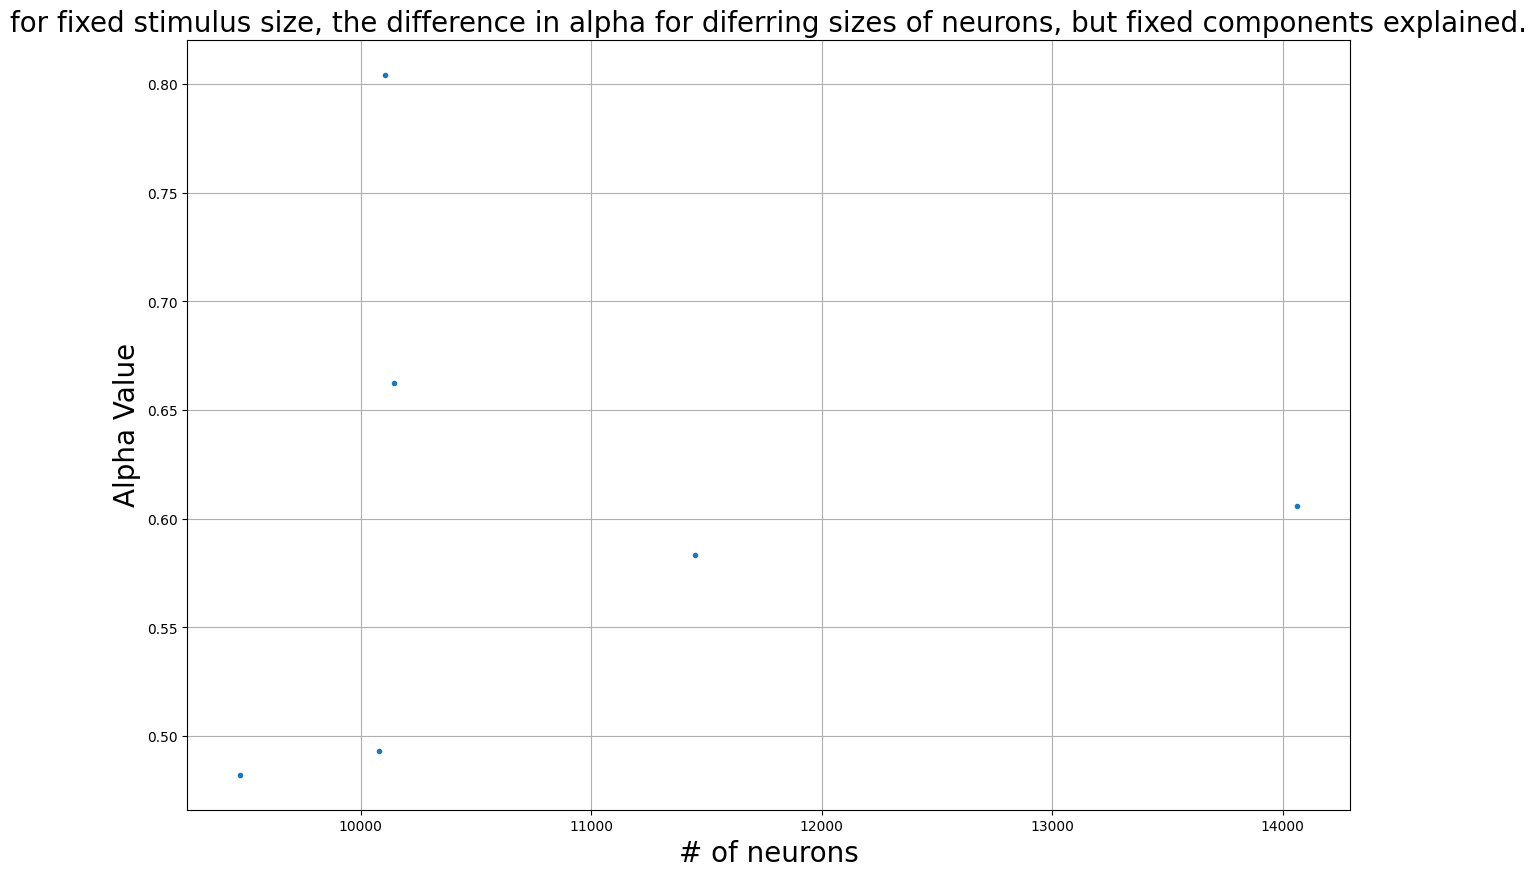

In [17]:
plt.plot(kiks, ass, '.')
plt.title("for fixed stimulus size, the difference in alpha for diferring sizes of neurons, but fixed components explained.", fontsize=20)
plt.xlabel("# of neurons", fontsize=20)
plt.ylabel("Alpha Value", fontsize=20)
plt.grid(True)
# kept stimulus size fixed but #neruons & ncomponents fixed.
# 

In [ ]:
# difference in alpha values across different sizes of neurons.

